Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

In [ ]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
#Read and study the provided dataset

#Create Dataframe object
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
 
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0             0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1             1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2             2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3             3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4             4.0  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
16463         NaN         NaN           NaN           NaN      NaN        NaN   
16464         NaN         NaN           NaN           NaN      NaN        NaN   
16465         NaN         NaN           NaN           NaN      NaN        NaN   
16466         NaN         NaN           NaN           NaN      NaN        NaN   
16467         NaN         NaN           NaN           NaN      NaN        NaN   

         4770  Total Bags  

In [29]:
#Explore the dataset

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [13]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [15]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (16468, 14)

The column headers in the dataset: Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


It was observed that the dataset contains 16468 rows and 14 columns out of which two are the variables of interest ('AveragePrice' and 'region')

In [16]:
#Check the description of the dataset and proceed with exploratory data analysis

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [30]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

It could be observed that the dataset contains 2 different types of data (object and float64)

In [31]:
#Check the null (missing) values in the dataset

df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There were huge missing values in all the features in the dataset

In [19]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


<Axes: >

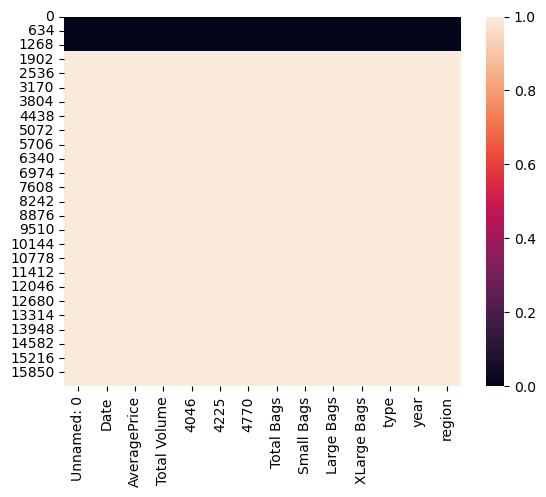

In [32]:
#Visualization with heatmap

sns.heatmap(df.isnull())

In [33]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
Unnamed: 0,52
Date,104
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377


In [34]:
#This value should be checked per column as follows in order to see the value count per column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Unnamed: 0
37.0    40
38.0    40
36.0    39
39.0    38
33.0    38
40.0    38
35.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
32.0    34
45.0    34
29.0    33
46.0    33
31.0    33
30.0    32
28.0    31
47.0    30
6.0     28
5.0     28
4.0     28
3.0     28
1.0     28
27.0    28
2.0     28
48.0    27
7.0     27
0.0     27
49.0    26
26.0    26
25.0    26
8.0     26
20.0    25
12.0    24
50.0    24
21.0    24
19.0    24
18.0    24
17.0    24
9.0     24
24.0    24
10.0    24
11.0    24
51.0    23
13.0    23
14.0    23
16.0    23
22.0    23
23.0    23
15.0    21
Name: count, dtype: int64


Date
12-04-2015    34
05-04-2015    34
19-04-2015    33
10-05-2015    32
22-03-2015    32
              ..
10-07-2016     3
03-07-2016     3
26-06-2016     3
19-06-2016     3
11-09-2016     2
Name: count, Length: 104, dtype: int64


AveragePrice
1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: count, Length: 1

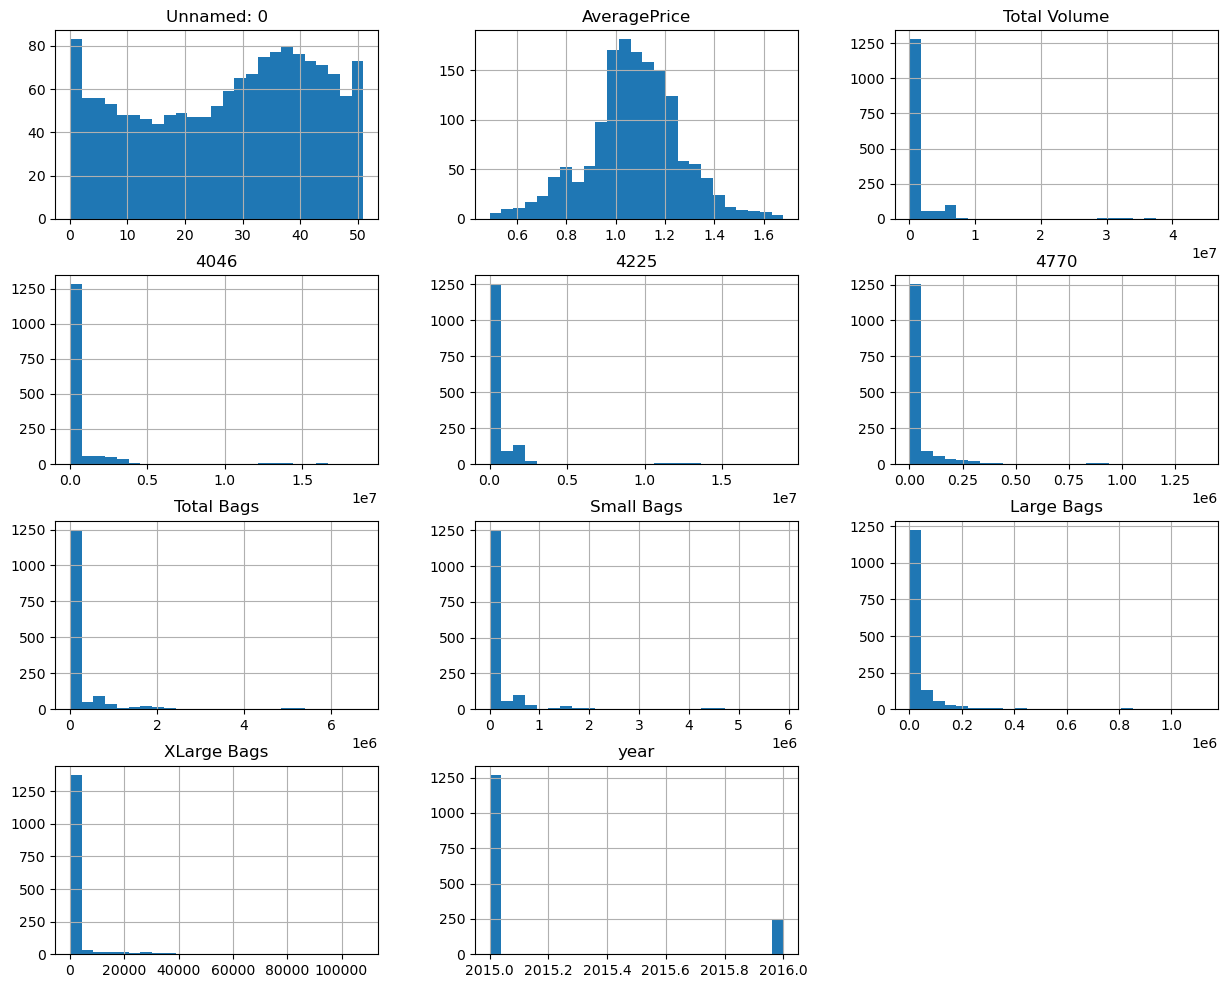

In [23]:
#Use visualization to further determine how the data is distributed on the features and display

df.hist(bins=25,figsize=(15,12))

plt.show()

* Encode the categorical columns (date, type and region) using Label Encoding

In [37]:
lenc = LabelEncoder()

for column in df.columns[:-1]:  
    df[column] = lenc.fit_transform(df[column])

df["Date"]=lenc.fit_transform(df["Date"])
df["type"]=lenc.fit_transform(df["type"])
df["region"]=lenc.fit_transform(df["region"])

* Cross-check head and Dataset description now

In [38]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,92,81,71,54,506,68,41,46,78,0,0,0,0
1,1,68,83,35,11,413,92,58,68,82,0,0,0,0
2,2,44,41,294,22,742,194,34,39,86,0,0,0,0
3,3,20,56,152,61,625,112,8,7,107,0,0,0,0
4,4,98,76,27,41,406,115,12,10,143,0,0,0,0


In [39]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000,16468.000000
mean,49.696624,99.083192,107.702514,1447.082402,1447.082402,1447.082402,1446.087867,1447.082402,1447.082402,1307.706825,660.886021,0.907882,1.830763,48.254554
std,8.519972,17.926373,17.580380,256.610271,256.610271,256.610271,256.580407,256.610271,256.610271,253.302146,171.622103,0.289201,0.543003,9.912157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,104.000000,113.000000,1517.000000,1517.000000,1517.000000,1516.000000,1517.000000,1517.000000,1377.000000,711.000000,1.000000,2.000000,51.000000
50%,52.000000,104.000000,113.000000,1517.000000,1517.000000,1517.000000,1516.000000,1517.000000,1517.000000,1377.000000,711.000000,1.000000,2.000000,51.000000
75%,52.000000,104.000000,113.000000,1517.000000,1517.000000,1517.000000,1516.000000,1517.000000,1517.000000,1377.000000,711.000000,1.000000,2.000000,51.000000
max,52.000000,104.000000,113.000000,1517.000000,1517.000000,1517.000000,1516.000000,1517.000000,1517.000000,1377.000000,711.000000,1.000000,2.000000,51.000000


<Axes: >

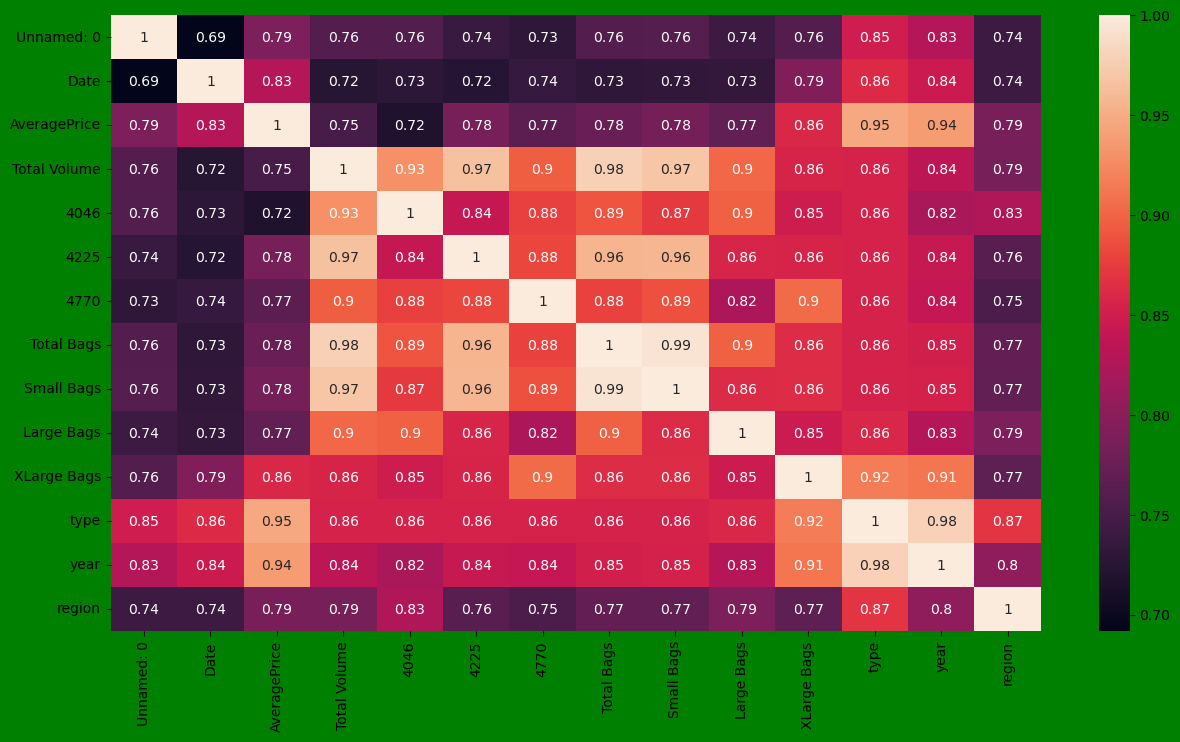

In [58]:
#Perform a correlation on the data to see nos of features that are correlated using heatmap

plt.figure(figsize=[15,8],facecolor='green')
sns.heatmap(df.corr(),annot=True)

* Model Training: Split the dataset into training and testing sets. Normalize the input variables using MinMaxScaler.

In [60]:
#Carry out the separation and normalization of variables having stored independent variables in X variables and the dependent variables in y variables.

x=df.drop('region',axis=1)

y=df['region']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) #Split the dataset


norm = MinMaxScaler()                             #normalization and fitting
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

print(new_xtrain)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


Train a classification model (e.g., Random Forest because it is the only ML model that gives the 88% accuracy i.e best accuracy) on the training set.

In [ ]:
#Model application and data fitting

rnd = RandomForestClassifier()
fit_rnd = rnd.fit(new_xtrain,y_train)
y_predict = rnd.predict(new_xtest)


#Predicting score

rnd_score = rnd.score(new_xtest,y_test)
print('The model score is : ',rnd_score)

print('******************')

print('Calculate error')

#Mean squared error
rnd_MSE = mean_squared_error(y_test,y_predict)

#Root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)

print('mean squared error is : ',rnd_MSE)
print('root mean squared error is : ',rnd_RMSE)
print(classification_report(x_predict,y_test))

In [61]:
#Differentiate the predicted value from the actual value

x_predict = list(rnd.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}

pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
253,113,9
10879,113,51
15350,113,51
5964,113,51
13369,113,51
8030,113,51
6360,113,51
2786,113,51
13081,113,51
15430,113,51


* Regression Analysis

In [62]:
#Define features (X) and target variable (y)

X = df.drop(['AveragePrice'], axis=1)
y = df['AveragePrice']

#Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)     #Random Forest Regressor model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
#Evaluate the model and display the metrics

lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.score(X_test, y_test)) 

0.930527577853636


In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.282876745598058
R-squared: 0.9792830313838604


* Average Price prediction

In [55]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Average Price')

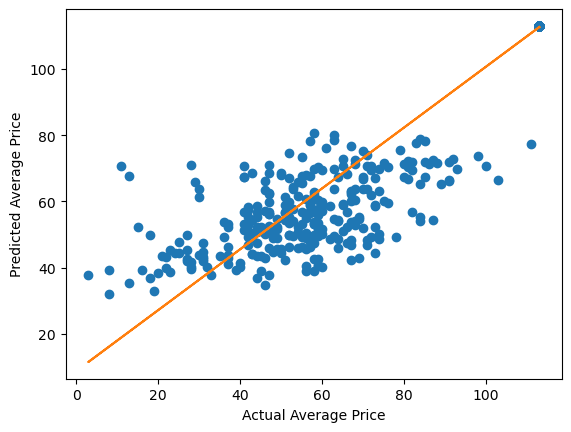

In [64]:
plt.plot(y_test, predictions, 'o')
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")

In [ ]:
#Create a user input for CGPA prediction and Dataframe as:

user_input = {}  

for column in df.columns:
    if column != 'AveragePrice':
        user_input[column] = int(input(f"Enter value for {column}: "))

user_input_df = pd.DataFrame([user_input])

avpr_predicted = lr.predict(user_input_df)

print("Predicted Average Price:", avpr_predicted[0])